<a href="https://colab.research.google.com/github/Magguire/Magguire/blob/main/module_2_core_week_I_ip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FIFA RESULTS PREDICTION

<b>Overview</b> 

You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

You have two possible approaches (as  shown below) given the datasets that will be provided

Input: Home team, Away team, Tournament type (World cup, Friendly, Other)



Approach 1: Polynomial approach

What to train given:

1. Rank of home team

2. Rank of away team

3. Tournament type

Model 1: Predict how many goals the home team scores.

Model 2: Predict how many goals the away team scores.

Approach 2: Logistic approach

Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

## 1. Defining the Question

Predict which team will win the upcoming game between Argentina and Brazil. 

### a) Specifying the Question

We need to perform predictive analysis on a dataset containing results of Argentina and Brazil including their current rankings in each game period in order to determine who will win the next game and with how many goals.

### b) Defining the Metric for Success

Predicting the winning team in the upcoming game and the score of winning team versus the other team. The prediction model used should have a low rmse value and a high accuracy score.  

### c) Understanding the context 

We have been provided with two datasets:
 - Fifa world rankings and total points of countries since 1993.
 - Results of matches between several teams since 1872.

We need to include rankings of the two teams we are using for prediction since the start date of the rankings which is 1993. 

### d) Recording the Experimental Design

1. Import necessary libraries
2. Read the datasets.
3. Preview the datasets.
4. Perform data cleaning on the datasets: Filter the columns to only include matches between Argentina and Brazil, hanlde missing values, check for ouliers and any other anomalies. Ensure columns are in the correct datatype.
5. Join the two datasets to find ranking of the two teams at every match
6. Perform exploratory data analysis on the results dataset which is our main dataset.
7. Perform predicive analysis using:
  i.) Polynomial approach - check rmse
  ii.) Logistic approach - check accuracy score using confusion matrix
8. Challenge the solution    
9. Give recommendations
10. Conclusion  

### e) Data Relevance


We have been provided with two datasets:
 - Fifa world rankings and total points of countries since 1993.
 - Results of matches between several teams since 1872.

From the two datasets, we are able to get monthly rankings of the two teams till 2018 and the matches played during this period.

## 2. Reading the Data

In [302]:
# Loading the Dataset
# fifa rankings = https://drive.google.com/file/d/1-UOI7HG2sArlb3IqIFu6ytLIDle1LnAp/view?usp=sharing
# results = https://drive.google.com/file/d/1FyTYM_vW6zywfMPeeC-FCs82jleURwBd/view?usp=sharing

import pandas as pd
import numpy as np
def read_data(url):
  file_id = url.split('/')[-2]
  dwn_url = 'https://drive.google.com/uc?id=' + file_id
  return pd.read_csv(dwn_url)

fifa = read_data(' https://drive.google.com/file/d/1-UOI7HG2sArlb3IqIFu6ytLIDle1LnAp/view?usp=sharing')
results = read_data('https://drive.google.com/file/d/1FyTYM_vW6zywfMPeeC-FCs82jleURwBd/view?usp=sharing')

## 3. Checking the Data

In [303]:
# Determining the no. of records in our dataset
#
fifa.shape, results.shape

((57793, 16), (40839, 9))

The fifa dataset contains 57793 and 16 columns while the results dataset contains 40839 records and 9 columns.

In [304]:
# Previewing the top of our dataset
#
fifa.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [305]:
fifa['country_full'].value_counts()

Sudan                    325
Germany                  286
Burkina Faso             286
Myanmar                  286
Congo                    286
                        ... 
Zaire                     66
Serbia and Montenegro     43
Kosovo                    24
Gibraltar                 22
RCS                        5
Name: country_full, Length: 216, dtype: int64

In [306]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [307]:
# Previewing the bottom of our dataset
# 
fifa.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [308]:
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


The fifa dataset contains information on rankings and rank changes for teams since 1993 to 2018. For our analysis and prediction, we are going to use the results dataset which carries the focus of the research question. 

In [309]:
# Checking whether each column has an appropriate datatype
#
results.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [310]:
fifa.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

In [311]:
# convert date to datetime
from datetime import datetime
results['date'] = pd.to_datetime(results['date'],  format='%Y-%m-%d')
fifa['rank_date'] = pd.to_datetime(fifa['rank_date'], format='%Y-%m-%d')

In [312]:
# create a column for year and month for each dataset
def month_year(data,column):
  data['year'] = pd.DatetimeIndex(data[column]).year
  data['year'] = data['year'].astype(str)
  data['month'] = pd.DatetimeIndex(data[column]).month
  data['month'] = data['month'].astype(str)
  # join month and year column
  data['month_year'] = data['year'] + '-' + data['month']

  # making adjustments
  data.drop('month', axis=1, inplace=True)
  data['year'] = data['year'].astype(int)
  return data.head()

month_year(results, 'date')  
month_year(fifa, 'rank_date')

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,year,month_year
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,1993-8
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,1993-8
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,1993-8
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,1993-8
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,1993-8


In [313]:
results.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
year                   int64
month_year            object
dtype: object

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

### a.Validation

In [314]:
# Let's validate the data by checking Brazil's years of Dominance
# From the fifa website, Brazil Men's ranking have been as follows:
# 12 (1994, 1995, 1996, 1997, 1998, 1999, 2000, 2002, 2003, 2004, 2005, 2006)
# 5 (2007, 2009, 2016, 2017, 2021)
# 5 (1993, 2001, 2018, 2019, 2020)

brazil = fifa[(fifa['country_full'] == 'Brazil') & (fifa['rank'] ==1)]
brazil['year'].unique()

array([1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2009, 2010, 2017])

Our dataset is valid as it accounts for rankings upto 2018. The data agrees that Brazil has acquired the top three positions for a total 18 years.

## 5. Tidying the Dataset

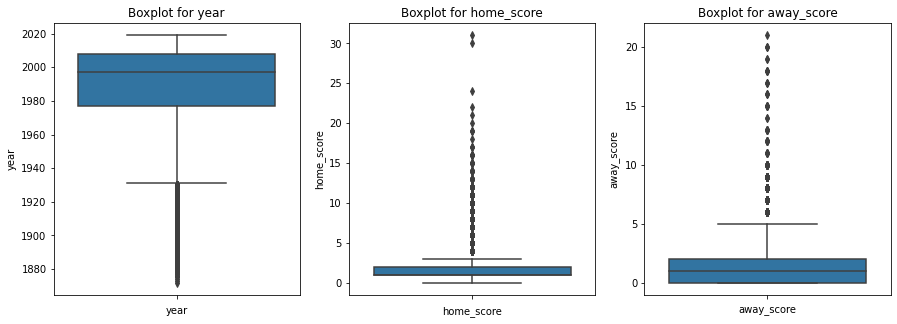

In [315]:
# Checking for Outliers
#
import matplotlib.pyplot as plt
import seaborn as sns

columns = ['year', 'home_score', 'away_score']
fig, ax = plt.subplots(ncols=len(columns),figsize=(15,5))

for i, column in enumerate(columns):
    sns.boxplot(y = results[column], ax=ax[i])
    ax[i].set_title('Boxplot for {}'.format(column))
    ax[i].set_xlabel(column)

plt.show()

From the outliers visuals, we can see that most games were played between 1940 and 2020. There are outliers for score which dont seem to be outliers as there is no limit to number of scores per game.

In [316]:
# Checking for Anomalies
#
# check interquatile range
def interquatile_range(column):
  q1 = results[column].quantile(.25)
  q3 = results[column].quantile(.75)
  intqr = q3 - q1
  return print({column: [q1,q3,intqr]})

for column in columns:
  interquatile_range(column)

{'year': [1977.0, 2008.0, 31.0]}
{'home_score': [1.0, 2.0, 1.0]}
{'away_score': [0.0, 2.0, 2.0]}


In [317]:
# Identifying the Missing Data
#
results.isnull().sum()

# There are no missing values in our dataset.

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
year          0
month_year    0
dtype: int64

In [318]:
# More data cleaning procedures
#
# check for duplicates
results.duplicated().sum()

# There are no duplicated values

0

In [319]:
# check uniformity in columns
results.columns

# columns are uniform

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'year', 'month_year'],
      dtype='object')

### Understanding soccer in General

Our dataset doesnot contain the target variable. This is however calculated from the score table. We are going to create our target variable as points with respect to the home team as follows: 

win - 3 points

draw - 1 points

lose - 0 point

#### Formula for ranking points:

<b>Points = Previous points + I * (W - We)</b>

I: Importance of the match:

<i>I= 05 Friendly matches played outside of International Match Calendar windows

I= 10 Friendly matches played during International Match Calendar windows

I= 15 Group phase matches of Nations League competitions

I= 25 Play-off and final matches of Nations League competitions

I= 25 Qualification matches for Confederations final competitions and for FIFA World Cup final competitions

I= 35 Confederation final competition matches up until the QF stage

I= 40 Confederation final competition matches from the QF stage onwards; all FIFA Confederations Cup matches

I= 50 FIFA World Cup final competition matches up until QF stage

I= 60 FIFA World Cup final competition matches from QF stage onwards</i> 

W is either: win = 1, draw = 0.5, lose = 0

We = 1/ (10exp(-(teamA previous points - teamB previous points)/600) + 1)


Before performing EDA, we are going to join our datasets, drop irrelevant columns and filter our dataset for only Argentina and Brazil.

We are going to join the datasets on month_year column since ranking is done almost monthly. From the fifa dataset, our only interest is the rank and total_points(for our convenience). 

We shall also print out outcome of the game with respect to the home team(Win, lose or draw). For this example, we will use numeric encoding such that win =3, lose=1 and draw=2  

In [320]:
# Implementing the Solution
# 
# we shall compare the home and away score and award points with respect to the home score

# create a value pair for home_score and away score
home_score = results['home_score'].tolist()
away_score = results['away_score'].tolist()
scores = list(zip(home_score,away_score))

# create an empty list to append points
points = []

# compare each value pair to award scores
for score in scores:
    if score[0] > score[1]:
       point = 2
    elif  score[0] == score[1]:  
       point = 1
    else:
       point = 0
    points.append(point)    

# convert points into a dataframe 
points = pd.DataFrame(points)

# rename column to points
points.columns = ['points']
points.head()

,points
0,1
1,2
2,2
3,1
4,2


In [321]:
# add points to results dataset
df = pd.concat([results, points], axis=1) 
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month_year,points
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,1872-11,1
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,1873-3,2
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,1874-3,2
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,1875-3,1
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,1876-3,2


In [322]:
# drop other columns to only include Argentina and Brazil
df1 = df[((df['home_team'] == 'Argentina') & (df['away_team'] == 'Brazil')) | ((df['home_team'] == 'Brazil') & (df['away_team'] == 'Argentina'))]
df1.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month_year,points
400,1914-09-20,Argentina,Brazil,3,0,Friendly,Buenos Aires,Argentina,False,1914,1914-9,2
401,1914-09-27,Argentina,Brazil,0,1,Copa Roca,Buenos Aires,Argentina,False,1914,1914-9,0
432,1916-07-10,Argentina,Brazil,1,1,Copa América,Buenos Aires,Argentina,False,1916,1916-7,1
462,1917-10-03,Argentina,Brazil,4,2,Copa América,Montevideo,Uruguay,True,1917,1917-10,2
498,1919-05-18,Brazil,Argentina,3,1,Copa América,Rio de Janeiro,Brazil,False,1919,1919-5,2


In [323]:
df1.shape

(104, 12)

In [324]:
# create a subset of the fifa dataset to only include important features
rank = fifa[['rank', 'country_full', 'total_points', 'year', 'month_year']]
rank.head()

,rank,country_full,total_points,year,month_year
0,1,Germany,0.0,1993,1993-8
1,2,Italy,0.0,1993,1993-8
2,3,Switzerland,0.0,1993,1993-8
3,4,Sweden,0.0,1993,1993-8
4,5,Argentina,0.0,1993,1993-8


In [325]:
home = df1.merge(rank, how='inner', left_on = ['home_team', 'month_year', 'year'], right_on=['country_full', 'month_year', 'year'])
home.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month_year,points,rank,country_full,total_points
0,1994-03-23,Brazil,Argentina,2,0,Friendly,Recife,Brazil,False,1994,1994-3,2,2,Brazil,0.0
1,1995-07-17,Brazil,Argentina,2,2,Copa América,Rivera,Uruguay,True,1995,1995-7,1,1,Brazil,0.0
2,1995-11-08,Argentina,Brazil,0,1,Friendly,Buenos Aires,Argentina,False,1995,1995-11,0,7,Argentina,0.0
3,1998-04-29,Brazil,Argentina,0,1,Friendly,Rio de Janeiro,Brazil,False,1998,1998-4,0,1,Brazil,0.0
4,1999-07-11,Brazil,Argentina,2,1,Copa América,Ciudad del Este,Paraguay,True,1999,1999-7,2,1,Brazil,0.0


In [326]:
home.shape

(26, 15)

In [327]:
# rename rank column to Home Team Rank
home.rename(columns = {'rank': 'home_team_rank'}, inplace=True)
home.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month_year,points,home_team_rank,country_full,total_points
0,1994-03-23,Brazil,Argentina,2,0,Friendly,Recife,Brazil,False,1994,1994-3,2,2,Brazil,0.0
1,1995-07-17,Brazil,Argentina,2,2,Copa América,Rivera,Uruguay,True,1995,1995-7,1,1,Brazil,0.0
2,1995-11-08,Argentina,Brazil,0,1,Friendly,Buenos Aires,Argentina,False,1995,1995-11,0,7,Argentina,0.0
3,1998-04-29,Brazil,Argentina,0,1,Friendly,Rio de Janeiro,Brazil,False,1998,1998-4,0,1,Brazil,0.0
4,1999-07-11,Brazil,Argentina,2,1,Copa América,Ciudad del Este,Paraguay,True,1999,1999-7,2,1,Brazil,0.0


In [328]:
away =  df1.merge(rank, how='inner', left_on = ['away_team', 'month_year', 'year'], right_on=['country_full', 'month_year', 'year'])
away.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month_year,points,rank,country_full,total_points
0,1994-03-23,Brazil,Argentina,2,0,Friendly,Recife,Brazil,False,1994,1994-3,2,8,Argentina,0.0
1,1995-07-17,Brazil,Argentina,2,2,Copa América,Rivera,Uruguay,True,1995,1995-7,1,5,Argentina,0.0
2,1995-11-08,Argentina,Brazil,0,1,Friendly,Buenos Aires,Argentina,False,1995,1995-11,0,1,Brazil,0.0
3,1998-04-29,Brazil,Argentina,0,1,Friendly,Rio de Janeiro,Brazil,False,1998,1998-4,0,7,Argentina,0.0
4,1999-07-11,Brazil,Argentina,2,1,Copa América,Ciudad del Este,Paraguay,True,1999,1999-7,2,6,Argentina,0.0


In [329]:
away.shape

(26, 15)

In [330]:
# rename rank column to Away Team Rank
away.rename(columns = {'rank': 'away_team_rank'}, inplace=True)
away.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month_year,points,away_team_rank,country_full,total_points
0,1994-03-23,Brazil,Argentina,2,0,Friendly,Recife,Brazil,False,1994,1994-3,2,8,Argentina,0.0
1,1995-07-17,Brazil,Argentina,2,2,Copa América,Rivera,Uruguay,True,1995,1995-7,1,5,Argentina,0.0
2,1995-11-08,Argentina,Brazil,0,1,Friendly,Buenos Aires,Argentina,False,1995,1995-11,0,1,Brazil,0.0
3,1998-04-29,Brazil,Argentina,0,1,Friendly,Rio de Janeiro,Brazil,False,1998,1998-4,0,7,Argentina,0.0
4,1999-07-11,Brazil,Argentina,2,1,Copa América,Ciudad del Este,Paraguay,True,1999,1999-7,2,6,Argentina,0.0


In [331]:
away.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'year', 'month_year',
       'points', 'away_team_rank', 'country_full', 'total_points'],
      dtype='object')

In [332]:
# drop all other columns except away_team_rank
away.drop(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'year', 'month_year',
       'points', 'country_full', 'total_points'], axis=1, inplace=True)
away.head()

,away_team_rank
0,8
1,5
2,1
3,7
4,6


In [333]:
# we now merge the two datasets for home and away on home_team, away_team, date and tournament
df1 = pd.concat([home,away], axis=1)
df1.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month_year,points,home_team_rank,country_full,total_points,away_team_rank
0,1994-03-23,Brazil,Argentina,2,0,Friendly,Recife,Brazil,False,1994,1994-3,2,2,Brazil,0.0,8
1,1995-07-17,Brazil,Argentina,2,2,Copa América,Rivera,Uruguay,True,1995,1995-7,1,1,Brazil,0.0,5
2,1995-11-08,Argentina,Brazil,0,1,Friendly,Buenos Aires,Argentina,False,1995,1995-11,0,7,Argentina,0.0,1
3,1998-04-29,Brazil,Argentina,0,1,Friendly,Rio de Janeiro,Brazil,False,1998,1998-4,0,1,Brazil,0.0,7
4,1999-07-11,Brazil,Argentina,2,1,Copa América,Ciudad del Este,Paraguay,True,1999,1999-7,2,1,Brazil,0.0,6


In [334]:
df1.shape

(26, 16)

In [335]:
df1.duplicated().sum()

0

In [336]:
df1.isnull().sum()

date              0
home_team         0
away_team         0
home_score        0
away_score        0
tournament        0
city              0
country           0
neutral           0
year              0
month_year        0
points            0
home_team_rank    0
country_full      0
total_points      0
away_team_rank    0
dtype: int64

In [337]:
# lets pick only necessary columns for our prediction
df = df1[['date', 'home_team', 'away_team', 'home_score', 'away_score','points',
       'tournament', 'home_team_rank','away_team_rank', 'year', 'neutral', 'city', 'country']]
df.head()

,date,home_team,away_team,home_score,away_score,points,tournament,home_team_rank,away_team_rank,year,neutral,city,country
0,1994-03-23,Brazil,Argentina,2,0,2,Friendly,2,8,1994,False,Recife,Brazil
1,1995-07-17,Brazil,Argentina,2,2,1,Copa América,1,5,1995,True,Rivera,Uruguay
2,1995-11-08,Argentina,Brazil,0,1,0,Friendly,7,1,1995,False,Buenos Aires,Argentina
3,1998-04-29,Brazil,Argentina,0,1,0,Friendly,1,7,1998,False,Rio de Janeiro,Brazil
4,1999-07-11,Brazil,Argentina,2,1,2,Copa América,1,6,1999,True,Ciudad del Este,Paraguay


## 6. Exploratory Analysis

In [338]:
# Ploting the univariate summaries and recording our observations
#
df.describe(include='all', datetime_is_numeric=True)

,date,home_team,away_team,home_score,away_score,points,tournament,home_team_rank,away_team_rank,year,neutral,city,country
count,26,26,26,26.000000,26.000000,26.000000,26,26.000000,26.000000,26.000000,26,26,26
unique,NaN,2,2,NaN,NaN,NaN,4,NaN,NaN,NaN,2,20,12
top,NaN,Brazil,Argentina,NaN,NaN,NaN,Friendly,NaN,NaN,NaN,False,Buenos Aires,Brazil
freq,NaN,13,13,NaN,NaN,NaN,14,NaN,NaN,NaN,16,6,8
mean,2006-05-23 06:27:41.538461568,NaN,NaN,1.846154,1.115385,1.384615,NaN,3.961538,4.576923,2005.769231,NaN,NaN,NaN
min,1994-03-23 00:00:00,NaN,NaN,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1994.000000,NaN,NaN,NaN
25%,1999-11-26 18:00:00,NaN,NaN,1.000000,0.000000,1.000000,NaN,1.000000,1.000000,1999.250000,NaN,NaN,NaN
50%,2006-01-30 12:00:00,NaN,NaN,2.000000,1.000000,2.000000,NaN,3.000000,5.000000,2005.500000,NaN,NaN,NaN
75%,2012-04-06 06:00:00,NaN,NaN,3.000000,1.750000,2.000000,NaN,6.500000,7.000000,2011.750000,NaN,NaN,NaN
max,2017-06-09 00:00:00,NaN,NaN,4.000000,4.000000,2.000000,NaN,12.000000,13.000000,2017.000000,NaN,NaN,NaN


The dates range from 1994 to 2017.

Argentina and Brazil have only been in 3 types of tournaments.


In [339]:
# barplot function for value counts
def barplot(column):
  df[column].value_counts().plot.bar(figsize=(10,4))
  plt.title('Barplot for {}'.format(column))
  plt.xlabel(column)
  plt.ylabel('Count')
  return plt.show()

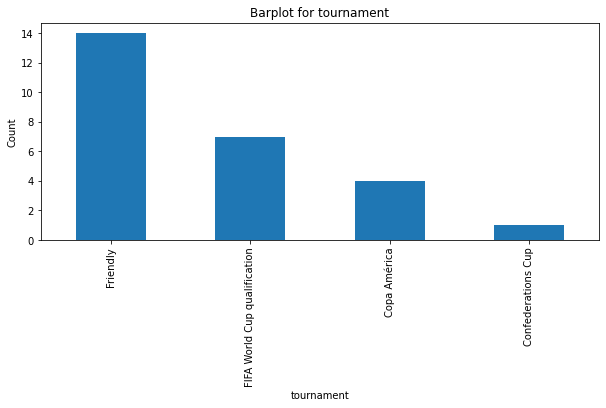

In [340]:
# tournament representation
barplot('tournament')

Most played matches by the two teams are Friendly.

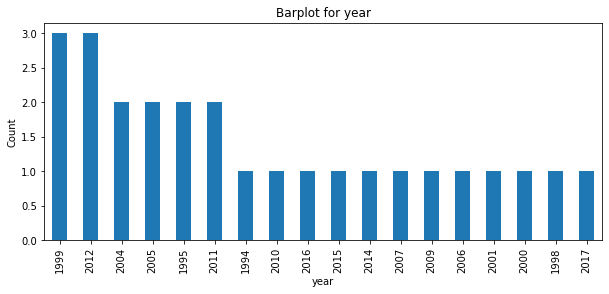

In [341]:
# year representation
barplot('year')

Most games in the dataset were played in 1999 and 2012.

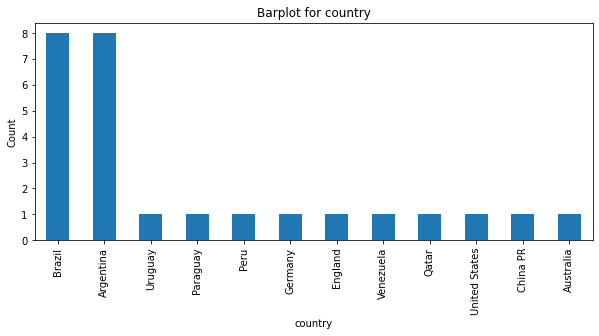

In [342]:
# country representation
barplot('country')

Most games were played in the Brazil and Argentina.
They played in neutral grounds of Uruguay, Paraguay, Peru, Germany, Venezuela, Qatar, U.S, China PR, and Australia.

In [343]:
df.head()

,date,home_team,away_team,home_score,away_score,points,tournament,home_team_rank,away_team_rank,year,neutral,city,country
0,1994-03-23,Brazil,Argentina,2,0,2,Friendly,2,8,1994,False,Recife,Brazil
1,1995-07-17,Brazil,Argentina,2,2,1,Copa América,1,5,1995,True,Rivera,Uruguay
2,1995-11-08,Argentina,Brazil,0,1,0,Friendly,7,1,1995,False,Buenos Aires,Argentina
3,1998-04-29,Brazil,Argentina,0,1,0,Friendly,1,7,1998,False,Rio de Janeiro,Brazil
4,1999-07-11,Brazil,Argentina,2,1,2,Copa América,1,6,1999,True,Ciudad del Este,Paraguay


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


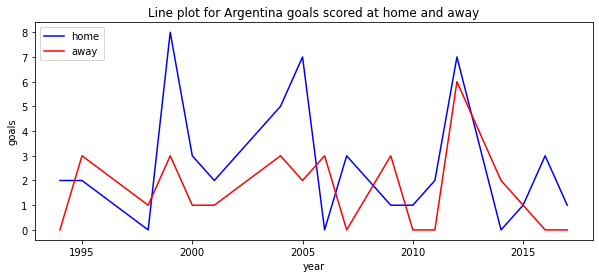

In [344]:
# Bivariate analysis
argentina = df[(df['home_team'] == 'Argentina') | (df['away_team'] == 'Argentina')]
arg = df.groupby('year', as_index=False)['home_score', 'away_score'].sum()
year = arg['year']
home = arg['home_score']
away = arg['away_score']

plt.figure(figsize=(10,4))
plt.plot(year, home, color='blue', label='home')
plt.plot(year, away, color='red', label='away')
plt.legend(loc='upper left')
plt.title('Line plot for Argentina goals scored at home and away')
plt.xlabel('year')
plt.ylabel('goals')
plt.show()

Argentina scored more goals at home than away. Highest number of goals scored at home are 8 while highest number of goals scored away are 6.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


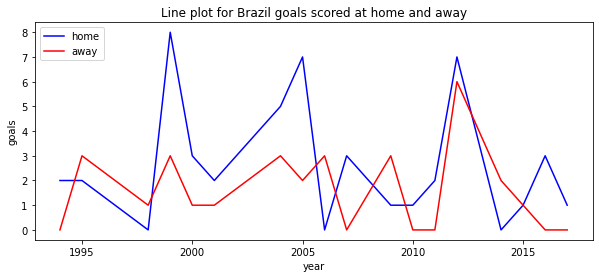

In [345]:
brazil = df[(df['home_team'] == 'Brazil') | (df['away_team'] == 'Brazil')]
braz = df.groupby('year', as_index=False)['home_score', 'away_score'].sum()
year = braz['year']
home = braz['home_score']
away = braz['away_score']

plt.figure(figsize=(10,4))
plt.plot(year, home, color='blue', label='home')
plt.plot(year, away, color='red', label='away')
plt.legend(loc='upper left')
plt.title('Line plot for Brazil goals scored at home and away')
plt.xlabel('year')
plt.ylabel('goals')
plt.show()

Similarly, Brazil scored more goals at home than away.The highest number of home goals is 8 and the highest number of away goals is 6.

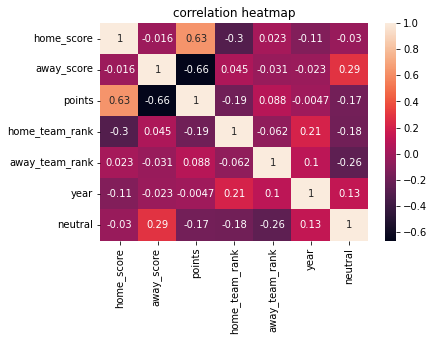

In [346]:
# check correlation
sns.heatmap(df.corr(), annot=True)
plt.title('correlation heatmap')
plt.show()

The strong poitive correlation between home score and points makes sense as points column has been derived from the performance of the home team. We will therefore not use points column for our predictive analysis.


## 7. Implementing the Solution

## Polynomial Approach

What to train given:

Rank of home team

Rank of away team

Tournament type

#### Model 1: Predict how many goals the home team scores.



In [347]:
df.head()

,date,home_team,away_team,home_score,away_score,points,tournament,home_team_rank,away_team_rank,year,neutral,city,country
0,1994-03-23,Brazil,Argentina,2,0,2,Friendly,2,8,1994,False,Recife,Brazil
1,1995-07-17,Brazil,Argentina,2,2,1,Copa América,1,5,1995,True,Rivera,Uruguay
2,1995-11-08,Argentina,Brazil,0,1,0,Friendly,7,1,1995,False,Buenos Aires,Argentina
3,1998-04-29,Brazil,Argentina,0,1,0,Friendly,1,7,1998,False,Rio de Janeiro,Brazil
4,1999-07-11,Brazil,Argentina,2,1,2,Copa América,1,6,1999,True,Ciudad del Este,Paraguay


In [348]:
# select necessary columns
df2 = df[['year', 'home_team', 'away_team', 'home_team_rank', 'away_team_rank', 'tournament', 'home_score', 'away_score', 'points', 'neutral']]
df2.head()

,year,home_team,away_team,home_team_rank,away_team_rank,tournament,home_score,away_score,points,neutral
0,1994,Brazil,Argentina,2,8,Friendly,2,0,2,False
1,1995,Brazil,Argentina,1,5,Copa América,2,2,1,True
2,1995,Argentina,Brazil,7,1,Friendly,0,1,0,False
3,1998,Brazil,Argentina,1,7,Friendly,0,1,0,False
4,1999,Brazil,Argentina,1,6,Copa América,2,1,2,True


In [349]:
# turn tournament categorical column into a numeric column
df2 = pd.get_dummies(df2)
df2.head()

,year,home_team_rank,away_team_rank,home_score,away_score,points,neutral,home_team_Argentina,home_team_Brazil,away_team_Argentina,away_team_Brazil,tournament_Confederations Cup,tournament_Copa América,tournament_FIFA World Cup qualification,tournament_Friendly
0,1994,2,8,2,0,2,False,0,1,1,0,0,0,0,1
1,1995,1,5,2,2,1,True,0,1,1,0,0,1,0,0
2,1995,7,1,0,1,0,False,1,0,0,1,0,0,0,1
3,1998,1,7,0,1,0,False,0,1,1,0,0,0,0,1
4,1999,1,6,2,1,2,True,0,1,1,0,0,1,0,0


In [350]:
# drop irrelevant columns. We shall use home_team_Brazil only to keep track of the home and away team
df2.drop(['home_team_Argentina', 'away_team_Argentina', 'away_team_Brazil'], axis=1, inplace=True)

In [351]:
# change neutral values manually
# 0 = False and 1 = True
df2['neutral'] = df2['neutral'].replace(True, 1).replace(False,0)
df2.head()                        

,year,home_team_rank,away_team_rank,home_score,away_score,points,neutral,home_team_Brazil,tournament_Confederations Cup,tournament_Copa América,tournament_FIFA World Cup qualification,tournament_Friendly
0,1994,2,8,2,0,2,0,1,0,0,0,1
1,1995,1,5,2,2,1,1,1,0,1,0,0
2,1995,7,1,0,1,0,0,0,0,0,0,1
3,1998,1,7,0,1,0,0,1,0,0,0,1
4,1999,1,6,2,1,2,1,1,0,1,0,0


In [352]:
df2.shape

(26, 12)

In [353]:
# split data into X and y

X = df2.drop(['home_score', 'away_score', 'points', 'year'], axis=1).values
y = df2['home_score'].values

In [354]:
# Split data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state = 0)



In [355]:
# create Linear regression model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

# fit for X_train and y_train
lin_reg.fit(X_train, y_train)

# evaluate results
from sklearn.metrics import mean_squared_error

y_pred = lin_reg.predict(X_test)

# get rmse
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse


1.1111777325968102

In [356]:
# finding residuals
residuals = np.subtract(y_test,y_pred)

# check residuals
pd.DataFrame(residuals).describe()

,0
count,8.000000
mean,-0.237883
std,1.160358
min,-1.303503
25%,-1.181525
50%,-0.759131
75%,0.870907
max,1.502210


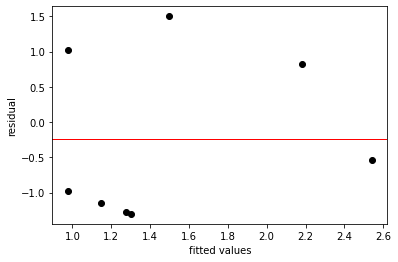

In [357]:
# plot residuals
plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

We can see that there are several outliers despite the mean being close to zero. Therefore the data is not normally distributed.

In [358]:
# fitting polynimial regression
# Split data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state = 0)


# create polynomial regression object
from sklearn.preprocessing import PolynomialFeatures

# look for a degree that minimizes the rmse
poly_reg = PolynomialFeatures(degree = 1)

# transform X_train 
X_poly = poly_reg.fit_transform(X_train)
X_test = poly_reg.transform(X_test)

# fit polynimial regression fitted model into linear regression
lin_reg = LinearRegression()

lin_reg.fit(X_poly, y_train)

# evaluate results
from sklearn.metrics import mean_squared_error

y_pred = lin_reg.predict(X_test)

# get rmse
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

1.1111777325968113

In [359]:
 # finding residuals
residuals = np.subtract(y_test,y_pred)

# check residuals
pd.DataFrame(residuals).describe()


,0
count,8.000000
mean,-0.237883
std,1.160358
min,-1.303503
25%,-1.181525
50%,-0.759131
75%,0.870907
max,1.502210


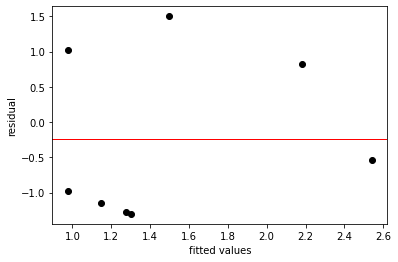

In [360]:
# plot residuals
plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

Since the number of polynomial degrees that minimizes the rmse is 1, this is similar to the linear regression model residual plot above.

In [361]:
# performing k_fold cross validation
from sklearn.model_selection import KFold
from sklearn import metrics

# perform k-fold using 10 folds
folds = KFold(n_splits=10)

# number of folds/splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# create and assess the 10 models based on the folds we created.

RMSES = [] 
count = 1

for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly

  lin_reg = LinearRegression()

  # fit for X_train and y_train
  lin_reg.fit(X_train, y_train)

  # look for a degree that minimizes the rmse
  poly_reg = PolynomialFeatures(degree = 1)

  # transform X_train 
  X_poly = poly_reg.fit_transform(X_train)

  # fit polynimial regression fitted model into linear regression
  lin_reg = LinearRegression()

  lin_reg.fit(X_poly, y_train)
  
  # assess the accuraccy of the model
  y_pred = lin_reg.predict(poly_reg.fit_transform(X_test))
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' --- Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 10 folds

Training model 1
Model 1 --- Root Mean Squared Error: 0.8581222223371546

Training model 2
Model 2 --- Root Mean Squared Error: 1.7407095733714957

Training model 3
Model 3 --- Root Mean Squared Error: 1.40154913742293

Training model 4
Model 4 --- Root Mean Squared Error: 1.206690307269919

Training model 5
Model 5 --- Root Mean Squared Error: 1.088680947356296

Training model 6
Model 6 --- Root Mean Squared Error: 0.9897278960670339

Training model 7
Model 7 --- Root Mean Squared Error: 1.3657549952899948

Training model 8
Model 8 --- Root Mean Squared Error: 1.7671111511311002

Training model 9
Model 9 --- Root Mean Squared Error: 1.2445865193664771

Training model 10
Model 10 --- Root Mean Squared Error: 0.20502342687616495


The least rmse score for polynomial regression method is for model 10 ~ 0.21.

The residuals are not centered around the mean which is close to 0. There is a pattern in the data which implies that there is unequal variance between at least two data points. The data is also not normally distributed due to the presence of outliers.

In [362]:
# heteroskedasticity test
from scipy import stats

test_result, p_value = stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')


0.17073007955064798
the variances are unequal, and the model should be reassessed


#### Model 2: Predict how many goals the away team scores.

In [363]:
# split data into X and y

X = df2.drop(['home_score', 'away_score', 'points', 'year'], axis=1).values
y = df2['away_score'].values

In [364]:
# Split data into train and test

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state = 0)


In [365]:
# create Linear regression model
lin_reg = LinearRegression()

# fit for X_train and y_train
lin_reg.fit(X_train, y_train)

# evaluate results

y_pred = lin_reg.predict(X_test)

# get rmse
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

1.2110444655943815

Root mean square value is fairly small which means that the accuracy of our model is high.

In [366]:
# finding residuals
residuals = np.subtract(y_test,y_pred)

# check residuals
pd.DataFrame(residuals).describe()

,0
count,8.000000
mean,0.057729
std,1.293189
min,-1.331569
25%,-1.158813
50%,0.077967
75%,0.813463
max,2.299783


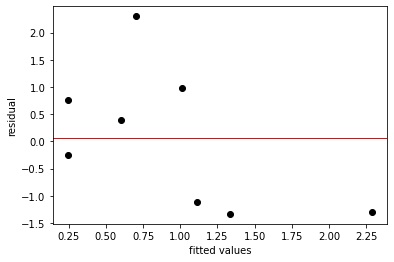

In [367]:
# plot residuals
plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

There are several outliers despite the mean being very close to zero. Therefore the data is not normally distributed.

In [380]:
# fitting polynimial regression

# create polynomial regression object
from sklearn.preprocessing import PolynomialFeatures

# look for a degree that minimizes the rmse
poly_reg = PolynomialFeatures(degree = 1)

# transform X_train 
X_poly = poly_reg.fit_transform(X_train)
X_test = poly_reg.transform(X_test)

In [381]:
# fit polynimial regression fitted model into linear regression
lin_reg = LinearRegression()

lin_reg.fit(X_poly, y_train)

# evaluate results
from sklearn.metrics import mean_squared_error

y_pred = lin_reg.predict(X_test)

# get rmse
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

0.5658608737695344

The root mean square error value is even smaller implying that this prediction model has more accurate results. 

In [370]:
# performing k_fold cross validation
from sklearn.model_selection import KFold
from sklearn import metrics

# perform k-fold using 10 folds
folds = KFold(n_splits=10)

# number of folds/splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# create and assess the 10 models based on the folds we created.

RMSES = [] 
count = 1

for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly

  lin_reg = LinearRegression()

  # fit for X_train and y_train
  lin_reg.fit(X_train, y_train)

  # look for a degree that minimizes the rmse
  poly_reg = PolynomialFeatures(degree = 1)

  # transform X_train 
  X_poly = poly_reg.fit_transform(X_train)

  # fit polynimial regression fitted model into linear regression
  lin_reg = LinearRegression()

  lin_reg.fit(X_poly, y_train)
  
  # assess the accuraccy of the model
  y_pred = lin_reg.predict(poly_reg.fit_transform(X_test))
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' --- Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 10 folds

Training model 1
Model 1 --- Root Mean Squared Error: 0.8383404466367272

Training model 2
Model 2 --- Root Mean Squared Error: 0.47103803070464667

Training model 3
Model 3 --- Root Mean Squared Error: 1.1621555475088785

Training model 4
Model 4 --- Root Mean Squared Error: 0.6015625184246106

Training model 5
Model 5 --- Root Mean Squared Error: 1.4022043329525928

Training model 6
Model 6 --- Root Mean Squared Error: 1.8706916741959454

Training model 7
Model 7 --- Root Mean Squared Error: 1.9878283524043634

Training model 8
Model 8 --- Root Mean Squared Error: 0.6631262533028627

Training model 9
Model 9 --- Root Mean Squared Error: 0.3739513573754706

Training model 10
Model 10 --- Root Mean Squared Error: 1.7923360557749528


Model 9 has the least rmse ~ 0.374

In [371]:
 # finding residuals
residuals = np.subtract(y_test,y_pred)

# check residuals
pd.DataFrame(residuals).describe()

,0
count,2.000000
mean,-1.771178
std,0.388320
min,-2.045762
25%,-1.908470
50%,-1.771178
75%,-1.633887
max,-1.496595


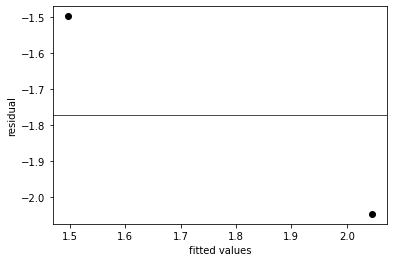

In [372]:
# plot residuals
plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

In [373]:
# heteroskedasticity test
from scipy import stats

test_result, p_value = stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

0.0
the variances are homogeneous!


## Approach 2: Logistic approach

In [374]:
# lets preview our dataset once more
# From the points column, win=3, draw=1 and loss=0
# we are going to predict the points given home team rank and away team rank, home score and away score and tournament type
df2.head()

,year,home_team_rank,away_team_rank,home_score,away_score,points,neutral,home_team_Brazil,tournament_Confederations Cup,tournament_Copa América,tournament_FIFA World Cup qualification,tournament_Friendly
0,1994,2,8,2,0,2,0,1,0,0,0,1
1,1995,1,5,2,2,1,1,1,0,1,0,0
2,1995,7,1,0,1,0,0,0,0,0,0,1
3,1998,1,7,0,1,0,0,1,0,0,0,1
4,1999,1,6,2,1,2,1,1,0,1,0,0


In [376]:
# we are going to predict the points given home team rank and away team rank, home score and away score
# split data into X and y
X = df2.drop('points', axis=1).values
y = df2['points'].values

In [377]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

In [378]:
# create logistic regression method

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000)

# fit model into X_train and y_train
log_reg.fit(X_train, y_train)

# make prediction for y
y_pred = log_reg.predict(X_test)

In [379]:
# Evaluating the model
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

# The results from the confusion matrix tell us that 3,1 and 4 are the number of correct predictions. 
# The accuracy in this case is therefore 100%

array([[3, 0, 0],
       [0, 1, 0],
       [0, 0, 4]])

The logistic regression model is overfitting the data.

## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






Our final dataset contains very few games played between Argentina and Brazil. This implies that the datasets contains missing matches and missing rankings which can be used for more accurate predictions. We would need to collect more data in order to decrease error in our models.

Another model also needs to be chosen for prediction since there the data points have unequal variances.

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

The data was accurate despite having very few datapoints for a pair of teams.

### b). Do we need other data to answer our question?

We need other data to answer the question.

### c). Did we have the right question?

Our research question was relevant since the dataset possess the capability to correctly our predict the variables.